# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [2]:
#Importing important Libraries
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
from ema_workbench.analysis import prim
import numpy as np
import matplotlib as plt

**Step 1**: This step involves the specification of Uncertainties, Levers and outcomes for the lake problem. These will be used for the open exploration

In [3]:
from lakemodel_function import lake_problem

from ema_workbench import (Model, RealParameter, ScalarOutcome)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter(f"l{i}", 0, 0.1) for i in 
                     range(lake_model.time_horizon)] # we use time_horizon here

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')] #  ScalarOutcome.MINIMIZE???

**Step 2**: At this level, we perform the experiments for 1000 scenarios and 10 policies as specified in the problem description. For this, we use a workbench library called MultiprocessingEvaluator

In [4]:

n_scenarios = 1000   #Scenario specification
n_policies = 10      #Policiy specification

#performing the experiments for given number of scenarios and policies
with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
#Print the experiment results
experiments   

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.262070,0.968623,0.037851,2.958223,0.004842,0.010380,0.099878,0.084389,0.029683,0.022124,...,0.074981,0.029543,0.094019,0.009953,0.082551,0.025687,0.052308,0,0,lakeproblem
1,0.336189,0.971399,0.014249,3.569684,0.001183,0.010380,0.099878,0.084389,0.029683,0.022124,...,0.074981,0.029543,0.094019,0.009953,0.082551,0.025687,0.052308,1,0,lakeproblem
2,0.275173,0.931182,0.034904,3.994587,0.004461,0.010380,0.099878,0.084389,0.029683,0.022124,...,0.074981,0.029543,0.094019,0.009953,0.082551,0.025687,0.052308,2,0,lakeproblem
3,0.296997,0.954316,0.049716,4.076144,0.002708,0.010380,0.099878,0.084389,0.029683,0.022124,...,0.074981,0.029543,0.094019,0.009953,0.082551,0.025687,0.052308,3,0,lakeproblem
4,0.420813,0.984251,0.036320,4.471307,0.001611,0.010380,0.099878,0.084389,0.029683,0.022124,...,0.074981,0.029543,0.094019,0.009953,0.082551,0.025687,0.052308,4,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.250562,0.965331,0.015708,2.209251,0.001559,0.065837,0.085323,0.022530,0.053337,0.063082,...,0.080513,0.085128,0.064815,0.039481,0.054996,0.042638,0.037151,995,9,lakeproblem
9996,0.167377,0.951736,0.046128,4.061025,0.001681,0.065837,0.085323,0.022530,0.053337,0.063082,...,0.080513,0.085128,0.064815,0.039481,0.054996,0.042638,0.037151,996,9,lakeproblem
9997,0.314695,0.976678,0.025132,2.033092,0.003861,0.065837,0.085323,0.022530,0.053337,0.063082,...,0.080513,0.085128,0.064815,0.039481,0.054996,0.042638,0.037151,997,9,lakeproblem
9998,0.240275,0.951953,0.038332,3.828245,0.003956,0.065837,0.085323,0.022530,0.053337,0.063082,...,0.080513,0.085128,0.064815,0.039481,0.054996,0.042638,0.037151,998,9,lakeproblem


**Step 3**: As required in the problem descripiton, we drop the values of the 100 decision levers so that they do not mess up the analysis

In [6]:
droplist = []               #Generate empty list 
for x in range (100):
    lever = "l"+str(x)
    droplist.append("l"+str(x))      # Append decision lever values as strings to the list

print(droplist)          #print list of decision levers 

['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25', 'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37', 'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49', 'l50', 'l51', 'l52', 'l53', 'l54', 'l55', 'l56', 'l57', 'l58', 'l59', 'l60', 'l61', 'l62', 'l63', 'l64', 'l65', 'l66', 'l67', 'l68', 'l69', 'l70', 'l71', 'l72', 'l73', 'l74', 'l75', 'l76', 'l77', 'l78', 'l79', 'l80', 'l81', 'l82', 'l83', 'l84', 'l85', 'l86', 'l87', 'l88', 'l89', 'l90', 'l91', 'l92', 'l93', 'l94', 'l95', 'l96', 'l97', 'l98', 'l99']


In [7]:
adjusted_experiments= experiments.drop(droplist, axis=1)      #drop the generated list pf decision levers 

In [8]:
adjusted_experiments   # Print new experiment results 

,b,delta,mean,q,stdev,scenario,policy,model
0,0.262070,0.968623,0.037851,2.958223,0.004842,0,0,lakeproblem
1,0.336189,0.971399,0.014249,3.569684,0.001183,1,0,lakeproblem
2,0.275173,0.931182,0.034904,3.994587,0.004461,2,0,lakeproblem
3,0.296997,0.954316,0.049716,4.076144,0.002708,3,0,lakeproblem
4,0.420813,0.984251,0.036320,4.471307,0.001611,4,0,lakeproblem
...,...,...,...,...,...,...,...,...
9995,0.250562,0.965331,0.015708,2.209251,0.001559,995,9,lakeproblem
9996,0.167377,0.951736,0.046128,4.061025,0.001681,996,9,lakeproblem
9997,0.314695,0.976678,0.025132,2.033092,0.003861,997,9,lakeproblem
9998,0.240275,0.951953,0.038332,3.828245,0.003956,998,9,lakeproblem


In [9]:
outcomes['reliability']   #print reliability column 

array([0.1119, 1.    , 0.7331, ..., 0.0515, 0.1373, 1.    ])

In [10]:
outcomes = pd.DataFrame.from_dict(outcomes)   # convert outcomes to dataFrame 

In [11]:
outcomes   #print outcomes 

,max_P,utility,inertia,reliability
0,4.157845,0.619515,0.666667,0.1119
1,0.263692,0.670993,0.666667,1.0000
2,3.831051,0.288901,0.666667,0.7331
3,3.743222,0.436473,0.666667,0.3398
4,0.261606,1.034122,0.666667,1.0000
...,...,...,...,...
9995,4.180649,0.610604,0.545455,0.0555
9996,6.657702,0.456068,0.545455,0.0709
9997,3.223052,0.833932,0.545455,0.0515
9998,4.612816,0.457944,0.545455,0.1373


**step 4**: Here, we need to focus on the 10% worst outcomes for reliability. For this, we first of all subset the subset those values using a nsmallest function, specifying 1000 for the percentage, since 10% of 10000 values is 1000

In [12]:
lowest_reliability = outcomes.nsmallest(1000, "reliability")   #subset 10% worst reliability values

In [13]:
lowest_reliability_df = lowest_reliability["reliability"]

In [14]:
lowest_reliability_df.max()   # Find the maximum of the worst values 

0.05000000000000004

In [19]:
x = adjusted_experiments
y = outcomes['reliability'] <=lowest_reliability_df.max()
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.11)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 1042 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.0504, coverage: 0.44337811900191937, density: 0.9166666666666666 restricted_dimensions: 4


AttributeError: module 'matplotlib' has no attribute 'show'

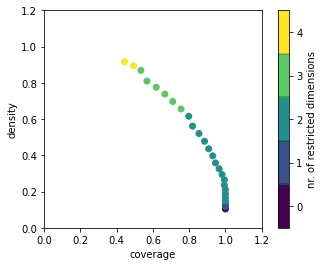

In [22]:
box1.show_tradeoff()            
plt.show()         #print the results on a box plot 

In [35]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.533589
density      0.86875
id                23
mass           0.064
mean         0.86875
res_dim            3
Name: 23, dtype: object

        box 23                                           
           min       max                        qp values
q     2.000104  2.666296  [-1.0, 1.4384448793498142e-192]
b     0.100335  0.193006  [-1.0, 4.7083982757436043e-181]
mean  0.012841  0.049987   [0.00044319249862495694, -1.0]



AttributeError: module 'matplotlib' has no attribute 'show'

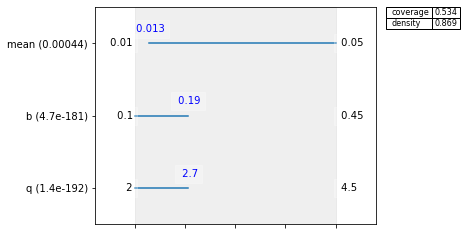

In [33]:
#Show the results in table and visual format
box1.inspect(23)
box1.inspect(23, style='graph')
plt.show()      

coverage    0.443378
density     0.916667
id                25
mass          0.0504
mean        0.916667
res_dim            4
Name: 25, dtype: object

                             box 25                               \
                                min                          max   
q                            2.0001                      2.56787   
b                          0.100335                     0.193006   
mean                       0.012841                    0.0499872   
policy  {0, 2, 3, 4, 5, 6, 7, 8, 9}  {0, 2, 3, 4, 5, 6, 7, 8, 9}   

                                         
                              qp values  
q       [-1.0, 1.5003005310486493e-173]  
b        [-1.0, 3.559281046210483e-150]  
mean      [0.0009172988508768932, -1.0]  
policy      [0.04518073816241622, -1.0]  



AttributeError: module 'matplotlib' has no attribute 'show'

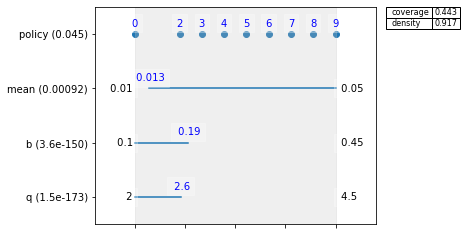

In [36]:
#Show the results in table and visual format
box1.inspect(25)
box1.inspect(25, style='graph')
plt.show() 

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

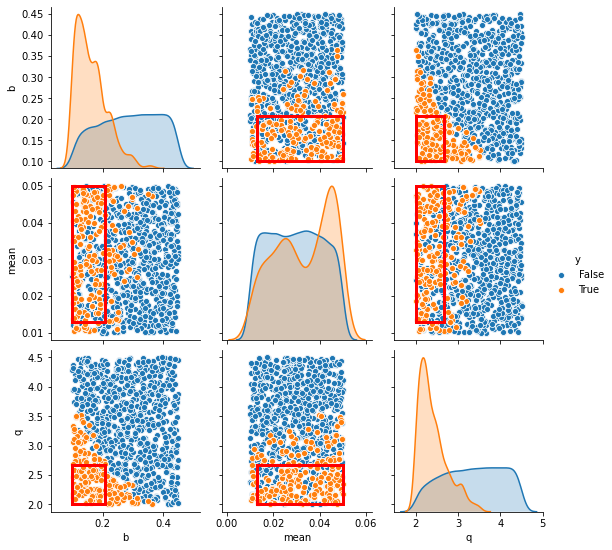

In [25]:
# Show the results as scatter plots 
box1.select(22) # make boxes to cover the 23 worst values 
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

**Interpretation of the results**:

From the results we can see that the most contributing factors that impact the reliability of the lake are q, beta and mean. From this scenario analysis we can see that low values for the natural removal rate (b) and the natural recycle rate (q) are the biggest contributors towards a low reliability result. This can be explained by the fact that a higher natural removal rate and recycle rate leads to a higher removal rate of phospher from year to year. A high mean also has an impact on the reliability since this results in higher natural inflows of phosphor in the lake which directly leads to higher phosphor concentrations. The p-values of the mean is however higher than for b and q and thus is the correlation between mean and reliability not as strong as for b and q.  

It is also interesting to see that the reliability of the lake does not seems to be impacted by the different policies. This can possibly be explained by the fact that the levers in the different policies are generated randomly and there isn't a big difference of the reliability between the different policies. Only if we take the point with the highest density (id 25) that policy 1 can be excluded and thus leads to the best values in regard to reliability.

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


AttributeError: module 'matplotlib' has no attribute 'show'

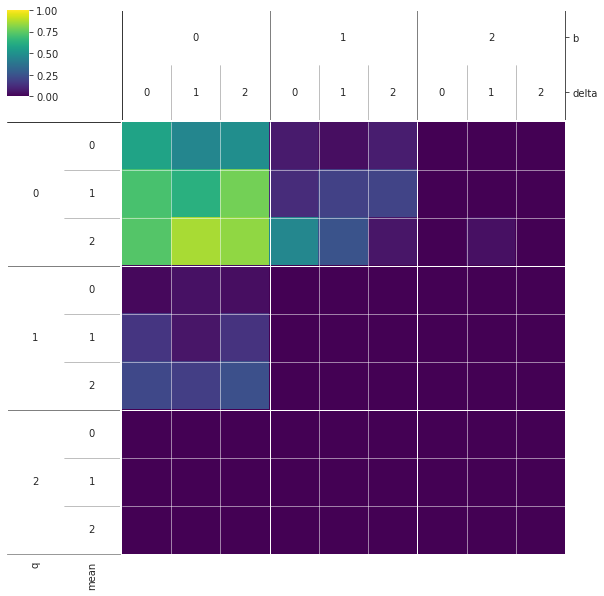

In [32]:
from ema_workbench.analysis import dimensional_stacking   # import the required library for dimensional stacking 

x = experiments
y = outcomes['reliability'] <=lowest_reliability_df.max()
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()      #print table 

**Interpretation of the Dimensional Stacking results: **

From the dimensional stacking diagram can be observes that low values for q and b result in a lower reliability of the lake (top right corner of diagram). A higher mean also impacts the system leading to lower reliability values. The last thing that can be observed is that there seems to be no correlation between delta and the reliability.

It can be concluded that the results from dimensional stacking are similar to the results from the scenario discovery.